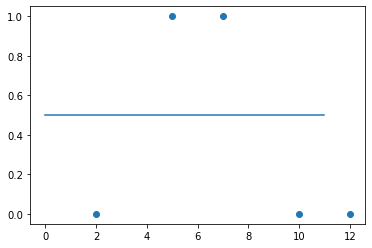

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([2, 5, 7, 10, 12])
label = np.array([0, 1, 1, 0, 0])

plt.scatter(data, label)
plt.plot([0.5]*max(data))
plt.show()

In [7]:
# compute residual
init_prob = 0.5

res = label - init_prob

res

array([-0.5,  0.5,  0.5, -0.5, -0.5])

In [12]:
# compute root similiarity score
def score(res, prob_list, lam=0):
    return np.sum(res)**2 / (np.sum([x*(1-x) for x in prob_list]) + lam)

init_prob_list = np.array([init_prob] * len(data))
root_score = score(res, init_prob_list)
root_score

0.2

In [16]:
# based on each feature to get split value
mid_value = [(data[i] + data[i+1])/2 for i in range(len(data) - 1)]

gain_list = []

for mid in mid_value:
    left_sati = data <= mid
    right_sati = data > mid

    left_res = res[left_sati]
    right_res = res[right_sati]
    left_prob = init_prob_list[left_sati]
    right_prob = init_prob_list[right_sati]

    left_gain = score(left_res, left_prob)
    right_gain = score(right_res, right_prob)

    final_gain = left_gain + right_gain - root_score
    gain_list.append(final_gain)

In [17]:
gain_list

[0.8, 0.1333333333333333, 2.1333333333333333, 0.8]

In [20]:
# get gain max index
max_gain_index = np.argmax(gain_list)

split_value = mid_value[max_gain_index]

print("get split value", split_value)

get split value 8.5


In [23]:
def node_pred(res, prob_list, lam=0):
    return np.sum(res) / (np.sum([x*(1-x) for x in prob_list]) + lam)



In [24]:
# make first stump
left_sati = data <= split_value
right_sati = data > split_value

left_res = res[left_sati]
right_res = res[right_sati]

left_prob = init_prob_list[left_sati]
right_prob = init_prob_list[right_sati]

left_node_pred = node_pred(left_res, left_prob)
right_node_pred = node_pred(right_res, right_prob)

print("left pred:", left_node_pred)
print("right pred:", right_node_pred)



left pred: 0.6666666666666666
right pred: -2.0


In [31]:
# final pred

# first should get init prob's log(odds)
learning_rate = 1
init_log_odds = np.log(init_prob / (1 - init_prob))

def sigmoid(x):
    return np.exp(x)/(1 + np.exp(x))

pred_list = []

for d in data:
    if d <= split_value:
        out = init_log_odds + learning_rate * left_node_pred
    else:
        out = init_log_odds + learning_rate * right_node_pred
    
    pred = sigmoid(out)
    
    pred_list.append(pred)
    
print(pred_list)

[0.6607563687658171, 0.6607563687658171, 0.6607563687658171, 0.11920292202211755, 0.11920292202211755]


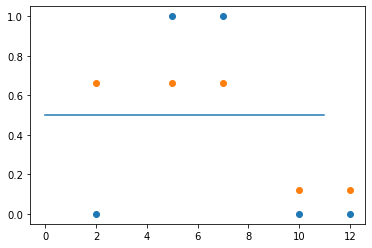

In [32]:
plt.scatter(data, label)
plt.scatter(data, pred_list)

plt.plot([0.5]* max(data))
plt.show()